Cause LSTM is difficult to train and more simple model might be good enough for S&P500 creation, we will work on simple multi perceptron model.

In [1]:
!pip install matplotlib --upgrade
!pip install quandl --upgrade
!pip install yahoo-finance --upgrade

#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    for name in name_list:
        share_list.append(Share(name))
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    for idx, share in enumerate(share_list):
        name = name_list[idx]
        hist_data = share.get_historical(start_date=start_date, end_date=end_date)
        stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
        date.append(get_data_by_key(key='Date', data=hist_data))
        stock_data_list.append(stock_data)
        N_data = len(stock_data)
        if N_data == 0:
            fail_name_list.append(name)
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Downloading/unpacking numpy>=1.6 from https://pypi.python.org/packages/dd/9f/cd0ec9c50e4ed8650901ad4afde164e5252b6182a9e0c7bff5f8b4441960/numpy-1.11.1.zip#md5=5caa3428b24aaa07e72c79d115140e46 (from matplotlib)
  Running setup.py (path:/tmp/pip_build_root/numpy/setup.py) egg_info for package numpy
    Running from numpy source directory.
    
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Downloading/unpacking pytz from https://pypi.python.org/packages/ae/cf/a7442138ad899a7587489641a8923f1e640cafc2d6ffe4e79e5d15cc5b3e/pytz-2016.4-py2.py3-none-any.whl#md5=77752641348a9ee3c064a8bc31fd80ce (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
  Found existing installati

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

269


Certain companies' data must be broken. Let's fix it!

In [4]:
def get_data_by_list_fixed(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    new_name_list = []
    for name in name_list:
        try:
            share_list.append(Share(name))
            new_name_list.append(name)
        except:
            pass
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    ret_name_list = []
    for idx, share in enumerate(share_list):
        name = new_name_list[idx]
        try:
            hist_data = share.get_historical(start_date=start_date, end_date=end_date)
            stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
            n_data = len(stock_data)
            if n_data == 0:
                fail_name_list.append(name)
            date.append(get_data_by_key(key='Date', data=hist_data))
            stock_data_list.append(stock_data)
            ret_name_list.append(name)
        except:
            pass
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date, ret_name_list

In [5]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date, input_list = get_data_by_list_fixed(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_GSPC", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  []
time for getting training_data: 869.468590975


In [6]:
print (input_data.shape)

(505, 269)


In [7]:
sp500_data = np.atleast_2d(target_data).T
# because of simplicity of computation we are going to focus on small number of stock data
n_stock = 50
index = np.arange(len(input_list))
np.random.shuffle(index)
input_mini = input_data[:, index[:n_stock]]

In [8]:
print (input_mini.shape)

(505, 50)


In [9]:
target_data = np.atleast_2d(target_data).T
print (target_data.shape)

(505, 1)


# work with simple way

In [10]:
import tensorflow as tf

In [134]:
pwd

u'/jupyter/tomoaki/Indicator Analysis'

In [151]:
class MLP(object):
    
    def __init__(self, layers, n_batch=None, learning_rate=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]])
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                z = tf.matmul(x, W) + b
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                normalized_z = self.batch_normalization(z, shape)
                x = self.activation(normalized_z)
        
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        if learning_rate is None:
            optimizer = tf.train.AdamOptimizer()
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate)
        self.train = optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape):
        # input should be hidden_dim
        eps = 1e-5
        gamma = tf.Variable(tf.constant(1.0, shape=shape))
        beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        self.init_op = tf.initialize_all_variables()
        
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

        with tf.Session() as sess:
            sess.run(self.init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target})
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # sess.run(self.init_op)
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

start!
loss: 3.95092e+06
loss: 705180.0
loss: 5927.22
loss: 5517.07
loss: 5515.96
loss: 5514.39
loss: 5514.8
loss: 5517.0
loss: 5512.41
loss: 5514.54
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 224.747996092
Model restored.


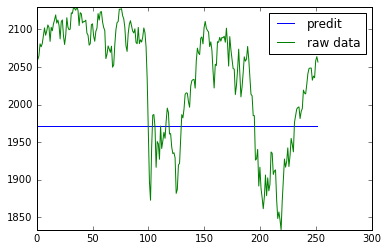

In [149]:
N = int(len(input_mini) * 0.5)

input_train = input_mini[:N]
target_train = target_data[:N]
input_pred = input_mini[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train, 
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_train)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

Hmm.....

It doesn't look nice.

# Lasso

As a comparison, I wil try analysis with lasso

In [52]:
N = int(len(input_mini) * 0.5)

input_train = input_mini[:N]
target_train = target_data[:N]
input_pred = input_mini[N:]
target_pred = target_data[N:]
n_in = len(input_loc[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import Lasso

clf = Lasso(alpha=1e-2, random_state=0)

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

plt.legend()

NameError: name 'input_loc' is not defined

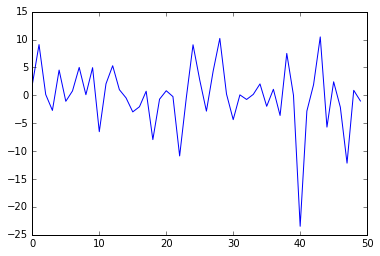

In [157]:
plt.plot(clf.coef_)

start!
learning_time: 0.0106930732727


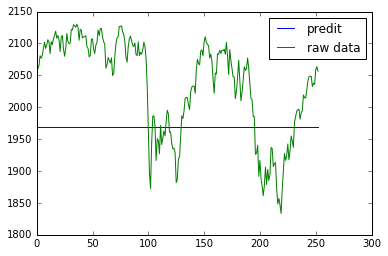

In [162]:
N = int(len(input_mini) * 0.5)

input_train = input_mini[:N]
target_train = target_data[:N]
input_pred = input_mini[N:]
target_pred = target_data[N:]
n_in = len(input_loc[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import Lasso

clf = Lasso(alpha=10, random_state=0)

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

plt.legend()

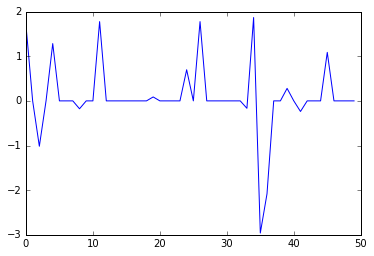

In [163]:
plt.plot(clf.coef_)

start!
learning_time: 0.00151610374451


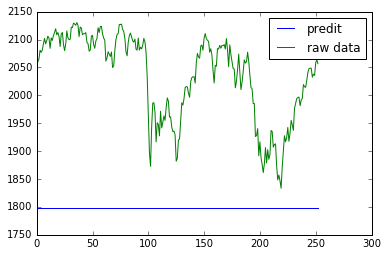

In [166]:
N = int(len(input_mini) * 0.5)

input_train = input_mini[:N]
target_train = target_data[:N]
input_pred = input_mini[N:]
target_pred = target_data[N:]
n_in = len(input_loc[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import Lasso

clf = Lasso(alpha=100, random_state=0)

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

plt.legend()

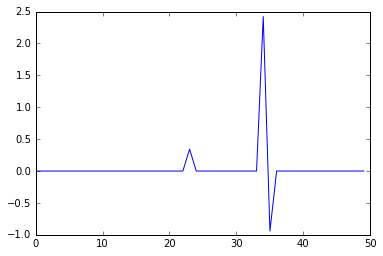

In [167]:
plt.plot(clf.coef_)

They don't look nice...

http://www.investopedia.com/ask/answers/05/sp500calculation.asp

According to this website, S&P500 is determined by 500 main companies. Each of comapnies has weights that determined by the ratio their size, which is calculated by market capitalization.

It means data in the form 
data[1:] /data[:-1] - 1 might be the best.

If you use a simple regression and use all of the 500 stock data, weights would be "real weights".

# Simple Regression

To check weather my thinking way is right, I will work on that with simple regression.

In [100]:
df_input = input_data[1:] / input_data[:-1] - 1.0
df_target = target_data[1:] / target_data[:-1] -1.0

start!
learning_time: 0.0740888118744


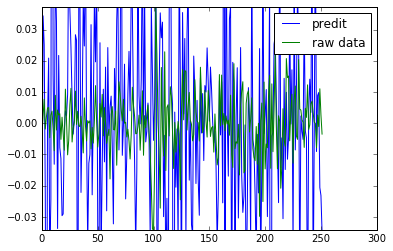

In [101]:
N = int(len(input_mini) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import LinearRegression

clf = LinearRegression()

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
learning_time: 0.133327960968


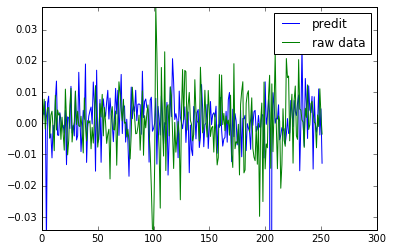

In [103]:
N = int(len(input_mini) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import Lasso

clf = Lasso(alpha=1e-6, random_state=0)

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# MLP

start!
loss: 1.91766
loss: 0.0624657
loss: 0.0460275
loss: 0.0226004
loss: 0.0152785
loss: 0.00966398
loss: 0.00908209
loss: 0.00757363
loss: 0.00339001
loss: 0.00448357
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 23.1943249702
Model restored.


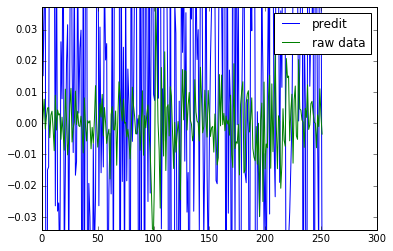

In [158]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden, n_out], learning_rate=1e-2, is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train, 
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.238862
loss: 0.0111215
loss: 0.00787185
loss: 0.0037223
loss: 0.00224129
loss: 0.00126367
loss: 0.000488804
loss: 0.000274325
loss: 0.000148034
loss: 0.000130306
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 33.8541479111
Model restored.


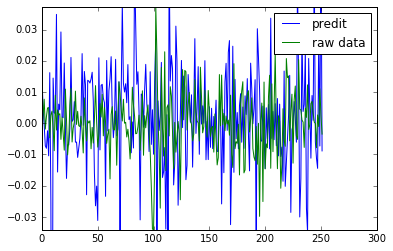

In [159]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden, n_hidden2,  n_out], learning_rate=1e-2, is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train, 
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 1.72063
loss: 0.0200821
loss: 0.0184384
loss: 0.0180365
loss: 0.017695
loss: 0.0174648
loss: 0.0147297
loss: 0.0144306
loss: 0.0128914
loss: 0.010114
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 34.0381250381
Model restored.


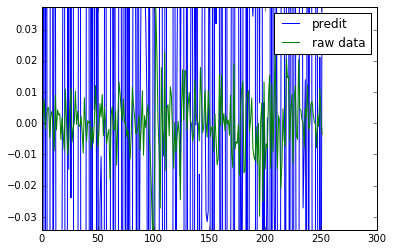

In [161]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden, n_hidden2,  n_out], learning_rate=1e-3, is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train, 
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 7.11881
loss: 0.0103629
loss: 0.00492521
loss: 0.002571
loss: 0.00235793
loss: 0.00106956
loss: 0.000357225
loss: 0.00030113
loss: 0.000185712
loss: 0.000124428
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 45.8156239986
Model restored.


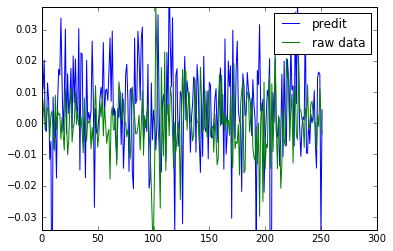

In [160]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2,  n_hidden3, n_out], learning_rate=1e-2, is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train, 
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# Relu

start!
loss: 1.53795
loss: 0.22869
loss: 0.140196
loss: 0.0768841
loss: 0.0658665
loss: 0.0271803
loss: 0.0112249
loss: 0.0116532
loss: 0.00439483
loss: 0.00272887
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 33.5382499695
Model restored.


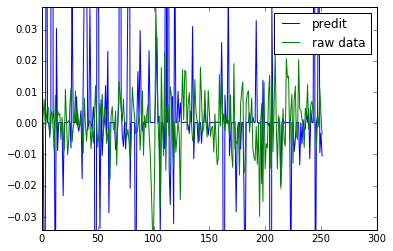

In [162]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden, n_hidden2,  n_out], activation=tf.nn.relu, learning_rate=1e-2, is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train, 
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

Relu doesn't make learning faster....

# Sigmoid

start!
loss: 1.24224
loss: 0.0773219
loss: 0.0601086
loss: 0.0464012
loss: 0.0364089
loss: 0.0296753
loss: 0.0244868
loss: 0.0200792
loss: 0.0168485
loss: 0.0140928
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 229.83888483
Model restored.


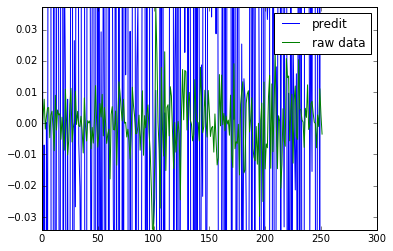

In [164]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden, n_out], learning_rate=1e-3, is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train, 
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

We will introduce decay of learning rate.

In [166]:
class MLP2(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]])
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                z = tf.matmul(x, W) + b
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                normalized_z = self.batch_normalization(z, shape)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[])
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer(self._learning_rate)
        self.train = optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape):
        # input should be hidden_dim
        eps = 1e-5
        gamma = tf.Variable(tf.constant(1.0, shape=shape))
        beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        self.init_op = tf.initialize_all_variables()
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

        with tf.Session() as sess:
            sess.run(self.init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    print ("change learning rate", learning_rate)
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # sess.run(self.init_op)
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

start!
loss: 0.0304006
change learning rate 0.05
loss: 6.52085e-05
change learning rate 0.025
loss: 5.99318e-05
change learning rate 0.0125
loss: 0.000148267
change learning rate 0.00625
loss: 5.40909e-05
change learning rate 0.003125
loss: 6.02461e-05
change learning rate 0.0015625
loss: 6.77538e-05
change learning rate 0.00078125
loss: 5.81046e-05
change learning rate 0.000390625
loss: 5.81705e-05
change learning rate 0.0001953125
loss: 5.87296e-05
change learning rate 9.765625e-05
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 34.1140699387
Model restored.


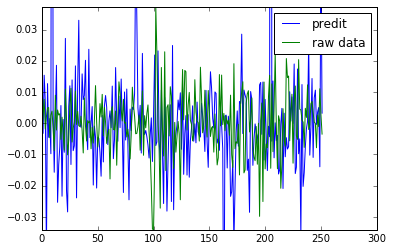

In [170]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=0.1, decay_freq=100, decay_rate=0.5,
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.125456
change learning rate 0.05
loss: 0.000105789
change learning rate 0.025
loss: 0.000133636
change learning rate 0.0125
loss: 0.000111589
change learning rate 0.00625
loss: 0.000119046
change learning rate 0.003125
loss: 0.00012445
change learning rate 0.0015625
loss: 0.000136719
change learning rate 0.00078125
loss: 0.000130983
change learning rate 0.000390625
loss: 0.00013367
change learning rate 0.0001953125
loss: 0.000132376
change learning rate 9.765625e-05
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 45.1625740528
Model restored.


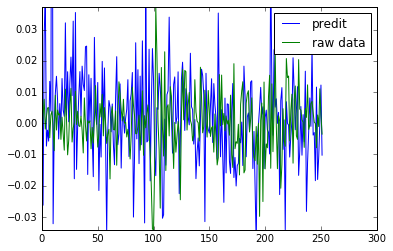

In [171]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=0.1, decay_freq=100, decay_rate=0.5,
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.479221
change learning rate 0.005
loss: 0.00718418
change learning rate 0.0025
loss: 0.00715444
change learning rate 0.00125
loss: 0.00715525
change learning rate 0.000625
loss: 0.00715524
change learning rate 0.0003125
loss: 0.00715525
change learning rate 0.00015625
loss: 0.00715525
change learning rate 7.8125e-05
loss: 0.00715524
change learning rate 3.90625e-05
loss: 0.00715524
change learning rate 1.953125e-05
loss: 0.00715525
change learning rate 9.765625e-06
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 47.730191946
Model restored.


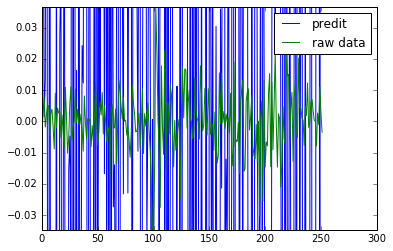

In [185]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.5,
                      n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# Change data shape

In [179]:
df_input = np.log(input_data[1:] / input_data[:-1])
df_target = np.log(target_data[1:] / target_data[:-1])

start!
loss: 1.20372
change learning rate 0.05
loss: 6.23302e-05
change learning rate 0.025
loss: 2.10933e-05
change learning rate 0.0125
loss: 1.66806e-05
change learning rate 0.00625
loss: 1.6512e-05
change learning rate 0.003125
loss: 1.633e-05
change learning rate 0.0015625
loss: 1.65236e-05
change learning rate 0.00078125
loss: 1.66277e-05
change learning rate 0.000390625
loss: 1.66593e-05
change learning rate 0.0001953125
loss: 1.66488e-05
change learning rate 9.765625e-05
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 333.018032074
Model restored.


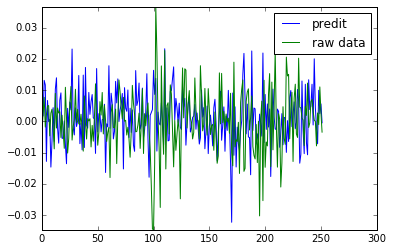

In [181]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=0.1, decay_freq=1000, decay_rate=0.5,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.0287375
change learning rate 0.009
change learning rate 0.0081
change learning rate 0.00729
change learning rate 0.006561
change learning rate 0.0059049
change learning rate 0.00531441
change learning rate 0.004782969
change learning rate 0.0043046721
change learning rate 0.00387420489
change learning rate 0.003486784401
loss: 0.00337082
change learning rate 0.0031381059609
change learning rate 0.00282429536481
change learning rate 0.00254186582833
change learning rate 0.0022876792455
change learning rate 0.00205891132095
change learning rate 0.00185302018885
change learning rate 0.00166771816997
change learning rate 0.00150094635297
change learning rate 0.00135085171767
change learning rate 0.00121576654591
loss: 0.00316842
change learning rate 0.00109418989132
change learning rate 0.000984770902184
change learning rate 0.000886293811965
change learning rate 0.000797664430769
change learning rate 0.000717897987692
change learning rate 0.000646108188923
change learning r

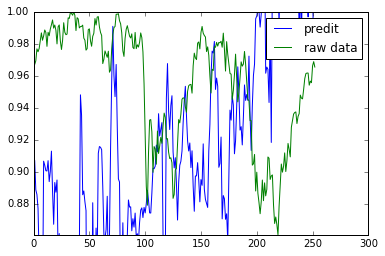

In [187]:
N = int(len(input_mini) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_mini[:N]
target_train = target_tilde[:N]
input_pred = input_mini[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# Online Prediction

In [173]:
class OnlineMLP(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]])
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                z = tf.matmul(x, W) + b
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                normalized_z = self.batch_normalization(z, shape)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[])
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer(self._learning_rate)
        self.train = optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape):
        # input should be hidden_dim
        eps = 1e-5
        gamma = tf.Variable(tf.constant(1.0, shape=shape))
        beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def predict(self, input_data, target_data, n_batch=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):  
        n_data = len(input_data)
        print_freq = int(n_data / 10)
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            # use n_batch previous data to train, predict the next data
            output_list = []
            learning_rate_tilde = learning_rate
            for idx in xrange(n_batch, n_data - 1):
                for epoch in xrange(n_epochs):
                    beg = idx - n_batch
                    end = idx
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate_tilde})
                    if (epoch + 1) % decay_freq == 0:
                        learning_rate_tilde *= decay_rate
                        # print ("change learning rate", learning_rate_tilde)
                    
                if idx % print_freq == 0:
                    print ("predict[%d]" % (idx + 1)) 
                output = self._output.eval(session=sess, 
                                                                feed_dict={self._input: input_data[idx + 1].reshape(1, len(input_data[0]))})
                output_list.append(output[0][0])
                
            return output_list

start!
predict[26]
predict[51]
predict[76]
predict[101]
predict[126]
predict[151]
predict[176]
predict[201]
predict[226]
predict[251]
learning_time: 480.522613049


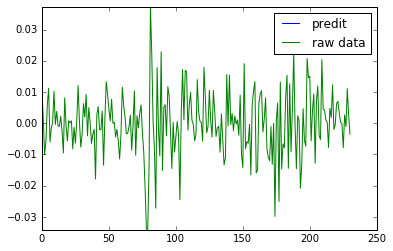

In [176]:
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = OnlineMLP(layers=[n_in, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
pred = mlp.predict(input_train, target_train,
                                  learning_rate=0.01, decay_freq=100, decay_rate=0.5,
                                  n_batch=n_batch, n_epochs=1000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

n_pred = len(pred)
plt.plot(pred, label="predit")
plt.plot(df_target[-n_pred:], label="raw data")
plt.ylim(min(df_target), max(df_target))

plt.legend()

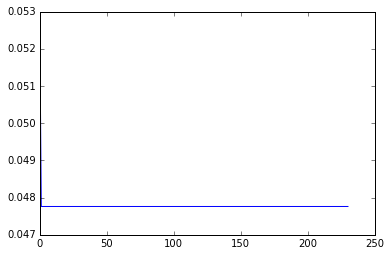

In [177]:
plt.plot(pred)

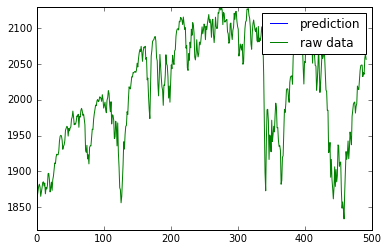

In [219]:
pred_df = np.cumprod(pred)
n_pred = len(pred_df)
plt.plot(pred_df * target_data[-n_pred - 1], label="prediction")
plt.plot(target_data[-n_pred:], label="raw data")
plt.ylim(min(target_data), max(target_data))
plt.legend()

In [257]:
class OnlineMLP2(object):
    
    def __init__(self, layers,
                           activation=tf.tanh, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [None, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [None, self.layers[-1]])
        
        def weight_variable(shape):
            initial = tf.truncated_normal(shape, stddev=1.0)
            return tf.Variable(initial)
        
        def bias_variable(shape):
            initial = tf.constant(0.0, shape=shape)
            return tf.Variable(initial)
        
        # the name of variable scope will be layer0, layer1, ...
        self.weights = []
        self.biases = []
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = weight_variable([n_in, n_out])
                b = bias_variable([n_out])
            x = self.activation(tf.matmul(x, W) + b)
            self.weights.append(W)
            self.biases.append(b)
        # output for training      
        self._output = x
        
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer()
        self.train = optimizer.minimize(self.loss)   
        
    def predict(self, input_data, target_data, pred_length=1, n_batch=10, n_epochs=100):  
        df_input = input_data[1:] / input_data[:-1] - 1.0
        df_target = target_data[1:] / target_data[:-1] -1.0
        n_data = len(df_input)
        print_freq = int(n_data / 10)
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            # use n_batch previous data to train, predict the next data
            pred_list = []
            for idx in xrange(n_batch, n_data - pred_length):
                for epoch in xrange(n_epochs):
                    beg = idx - n_batch
                    end = idx
                    batch_input = df_input[beg:end]
                    batch_target = df_target[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target})
                    
                if idx % print_freq == 0:
                    print ("predict[%d]" % (idx + 1)) 
                    loss = self.loss.eval(session=sess, 
                                                       feed_dict={self._input: batch_input, self._target:batch_target})
                    print ("loss: ", loss)
                output = self._output.eval(session=sess, 
                                                                feed_dict={self._input: np.atleast_2d(df_input[idx: idx + pred_length])})
                pred = target_data[end] * np.cumprod((output + 1.0)[:, 0])
                pred_list.append(pred[-1])
                
            return pred_list

start!
predict[51]
loss:  4.38349e-08
predict[101]
loss:  3.66691e-07
predict[151]
loss:  1.73581e-08
predict[201]
loss:  1.95017e-09
predict[251]
loss:  2.54503e-09
predict[301]
loss:  1.8946e-08
predict[351]
loss:  1.34458e-08
predict[401]
loss:  4.82983e-09
predict[451]
loss:  5.81074e-09
predict[501]
loss:  7.92157e-10
learning_time: 59.0400569439


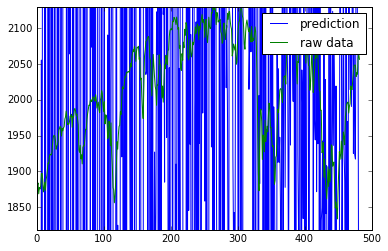

In [258]:
N = int(len(df_input) * 0.5)

n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = OnlineMLP2(layers=[n_in, n_hidden, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
prediction = mlp.predict(input_data, target_data, pred_length=1,
                                 n_batch=n_batch, n_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)


n_pred = len(prediction)
plt.plot(prediction, label="prediction")
plt.plot(target_data[-n_pred:], label="raw data")
plt.ylim(min(target_data), max(target_data))
plt.legend()

plt.legend()

start!
predict[51]
loss:  0.374272
predict[101]
loss:  0.317179
predict[151]
loss:  0.274826
predict[201]
loss:  0.350341
predict[251]
loss:  0.358119
predict[301]
loss:  0.222383
predict[351]
loss:  0.147728
predict[401]
loss:  0.0650563
predict[451]
loss:  0.140641
predict[501]
loss:  0.147495
learning_time: 0.915509939194


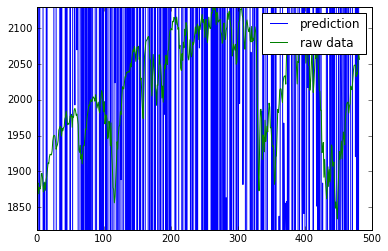

In [261]:
N = int(len(df_input) * 0.5)

n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=20

mlp = OnlineMLP2(layers=[n_in, n_hidden, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
prediction = mlp.predict(input_data, target_data, pred_length=1,
                                 n_batch=n_batch, n_epochs=1)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)


n_pred = len(prediction)
plt.plot(prediction, label="prediction")
plt.plot(target_data[-n_pred:], label="raw data")
plt.ylim(min(target_data), max(target_data))
plt.legend()

plt.legend()

In [255]:
class OnlineMLP3(object):
    
    def __init__(self, layers,
                           activation=tf.tanh, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [None, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [None, self.layers[-1]])
        
        def weight_variable(shape):
            initial = tf.truncated_normal(shape, stddev=1.0)
            return tf.Variable(initial)
        
        def bias_variable(shape):
            initial = tf.constant(0.0, shape=shape)
            return tf.Variable(initial)
        
        # the name of variable scope will be layer0, layer1, ...
        self.weights = []
        self.biases = []
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = weight_variable([n_in, n_out])
                b = bias_variable([n_out])
            x = self.activation(tf.matmul(x, W) + b)
            self.weights.append(W)
            self.biases.append(b)
        # output for training      
        self._output = x
        
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer()
        self.train = optimizer.minimize(self.loss)   
        
    def predict(self, input_data, target_data, pred_length=1, n_batch=10, n_epochs=100):  
        df_input = np.log(input_data[1:] / input_data[:-1])
        df_target = np.log(target_data[1:] / target_data[:-1])
        n_data = len(df_input)
        print_freq = int(n_data / 10)
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            # use n_batch previous data to train, predict the next data
            pred_list = []
            for idx in xrange(n_batch, n_data - pred_length):
                for epoch in xrange(n_epochs):
                    beg = idx - n_batch
                    end = idx
                    batch_input = df_input[beg:end]
                    batch_target = df_target[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target})
                    
                if idx % print_freq == 0:
                    print ("predict[%d]" % (idx + 1)) 
                    loss = self.loss.eval(session=sess, 
                                                       feed_dict={self._input: batch_input, self._target:batch_target})
                    print ("loss: ", loss)
                output = self._output.eval(session=sess, 
                                                                feed_dict={self._input: np.atleast_2d(df_input[idx: idx + pred_length])})
                pred = target_data[end] * np.cumprod(np.exp(output[:, 0]))
                print (np.cumprod(np.exp(output[:, 0])))
                pred_list.append(pred[-1])
                
            return pred_list

start!
[ 1.76529849]
[ 1.17952359]
[ 2.60516715]
[ 0.48825109]
[ 0.45134327]
[ 0.39385813]
[ 1.76551735]
[ 1.80122983]
[ 2.28737092]
[ 0.47526625]
[ 1.09218824]
[ 0.52576715]
[ 0.38595682]
[ 0.38262612]
[ 1.51403403]
[ 2.17802024]
[ 1.69936168]
[ 1.46246517]
[ 2.01081443]
[ 1.87016249]
[ 1.9469347]
[ 0.45256084]
[ 1.81703186]
[ 1.02064657]
[ 0.44622147]
[ 0.97063667]
[ 0.36836362]
[ 0.568744]
[ 2.56339908]
[ 0.38695511]
[ 2.68130684]
[ 0.46643987]
[ 0.45546782]
[ 0.36835313]
[ 2.68297768]
[ 2.34513044]
[ 1.74909759]
[ 2.27409506]
[ 0.61012203]
[ 2.37063813]
predict[51]
loss:  1.91893e-06
[ 2.57731581]
[ 2.70805311]
[ 2.52802134]
[ 1.4661839]
[ 0.49812633]
[ 0.52603054]
[ 0.4210619]
[ 0.65460736]
[ 0.62087578]
[ 1.40372527]
[ 1.8954134]
[ 0.37109956]
[ 0.78225392]
[ 1.67972112]
[ 1.13688707]
[ 0.7824378]
[ 0.95887238]
[ 1.11081648]
[ 1.04713678]
[ 1.43787122]
[ 1.93432808]
[ 0.42405108]
[ 1.95705998]
[ 0.53414899]
[ 1.55223763]
[ 2.63233185]
[ 0.66157383]
[ 0.47504935]
[ 1.79483116]
[ 0

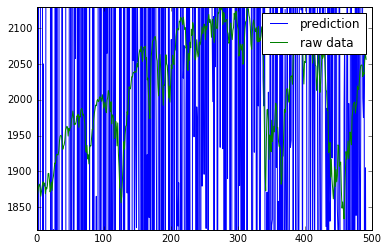

In [256]:
N = int(len(df_input) * 0.5)

n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden)
n_out = 1
n_batch=10

mlp = OnlineMLP3(layers=[n_in, n_hidden, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
prediction = mlp.predict(input_data, target_data, pred_length=1,
                                 n_batch=n_batch, n_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)


n_pred = len(prediction)
plt.plot(prediction, label="prediction")
plt.plot(target_data[-n_pred:], label="raw data")
plt.ylim(min(target_data), max(target_data))
plt.legend()

plt.legend()